In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#machine learning imports
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set()

In [2]:
#import the dataset
population=pd.read_csv('AsiaPopulation2020.csv')
population

#clean data (set NaN values to 0 & change the string values to digits)
population=population.fillna(0)
print(population.shape)
population.iloc[:5,:]

(51, 11)


,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


Accuracy: 0.008499074841591698


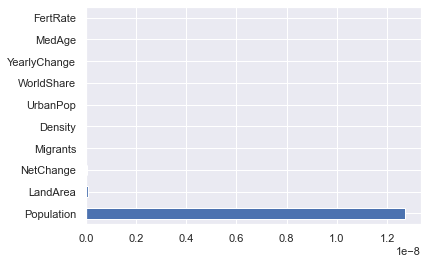

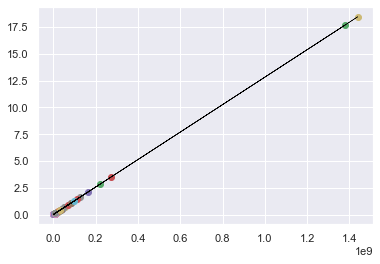

In [3]:
#use a SVC predict the 'World Share' column for each asian country (pre-classified)
#sort into feature matrix and target
X=population.iloc[:,1:]
y=population.iloc[:,-1]
X.shape,y.shape

#further split the data into its train and test quantities
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

#create the regressor, fit the model, predict test values, then check its accuracy
regressor=SVR(kernel='linear')
#regressor.classes=labels
regressor.fit(X,y)
y_pred=regressor.predict(X_test)
print('Accuracy:',mean_squared_error(y_test,y_pred))

#get the features to look at which is the most important 
pd.Series(abs(regressor.coef_[0]), index=population.columns[1:]).nlargest(10).plot(kind='barh')

#make a graph to display the relationship between population and worldshare
fig,ax=plt.figure(),plt.axes()
#population.iloc[1,1]
for num in range(50):
    ax.scatter(population.iloc[num,1],population.iloc[num,10])
plt.plot(population['Population'],population['WorldShare'],linestyle='-',linewidth=.5,color='black')
plt.xlabel='Population'
plt.ylabel='World Share'
plt.show()

In [23]:
#Predict the worldshare value of a country that isn't in the dataframe
America=pd.DataFrame([330150668,9826675,0,0,0,0,0,0,0,0]).T
American_WorldShare=regressor.predict(America)
print('Predicted American World Share ',American_WorldShare[0],'\nActual American World Share ',4.23)

Predicted American World Share  4.287260784829046 
Actual American World Share  4.23
